In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random_walk_helper_functions as rwf
import scipy
from scipy.stats import norm

In [20]:
dir = "/home/meric/Desktop/breast_tumor_project/"
umap_data_dir = dir + "br2_umap_coords.tsv"
pca_data_dir = dir + "br2_pca_coords.tsv"

In [133]:
# First data
#umap_df = pd.read_table("/home/meric/Desktop/umap_coords.tsv",index_col=0,sep="\t")
#umap_df.columns = umap_df.columns.str.replace('.', '-', regex=True)
#pca_df = pd.read_table("/home/meric/Desktop/pca_coords.tsv",index_col=0,sep="\t")
#pca_df.columns = pca_df.columns.str.replace('.', '-', regex=True)

In [135]:
umap_df = pd.read_csv(umap_data_dir, sep="\t", index_col=0)
umap_df.columns = umap_df.columns.str.replace('.', '-', regex=True)
umap_df.head()

,UMAP_1,UMAP_2
midpoint_2022_AAACGCTGTGTAAATG-1,-3.727179,-1.020334
midpoint_2022_AAAGAACTCCAACTAG-1,-1.653312,-0.577389
midpoint_2022_AAAGAACTCTTCTGTA-1,-1.313342,-0.625920
midpoint_2022_AAAGGATTCAAGCCAT-1,-5.610435,0.519023
midpoint_2022_AAAGGGCTCCGTGGGT-1,-9.204740,-5.912003


In [136]:
pca_df = pd.read_csv(pca_data_dir, sep="\t", index_col=0)
pca_df.columns = pca_df.columns.str.replace('.', '-', regex=True)
pca_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
midpoint_2022_AAACGCTGTGTAAATG-1,12.570557,-1.560516,-0.321109,1.481060,0.351270,-6.052600,-0.323439,-0.864905,2.712575,1.726351,...,0.133864,-0.038545,1.538477,0.417500,0.602559,-1.307176,0.305688,0.570489,1.945417,1.016327
midpoint_2022_AAAGAACTCCAACTAG-1,11.675000,-1.310510,0.823966,3.270171,1.314359,-8.668641,0.827346,2.208419,0.201210,1.276308,...,-0.080733,-2.303382,-0.291809,0.570207,0.355696,1.419627,0.456954,-1.105830,1.107100,0.785991
midpoint_2022_AAAGAACTCTTCTGTA-1,12.054394,-0.591662,0.051444,3.523285,2.693378,-8.701379,-0.742966,2.515007,0.681395,0.571392,...,-0.714644,0.706496,-1.595977,-0.019651,-0.794807,-1.076685,1.018425,0.737116,-1.173221,-0.943316
midpoint_2022_AAAGGATTCAAGCCAT-1,10.514706,2.767524,-1.067258,-0.561062,-2.292628,-2.877209,1.232073,-6.947691,5.358545,0.330784,...,-0.870207,0.463035,-0.603187,0.012906,-0.370429,-3.194008,1.427366,0.065760,0.669537,-0.428605
midpoint_2022_AAAGGGCTCCGTGGGT-1,12.517384,-10.095679,-0.302902,-2.930189,1.313240,7.650752,-0.429542,0.269205,-1.267492,-0.225093,...,0.210574,0.566568,-0.778499,-0.440816,-1.019993,0.623087,-1.414719,0.328926,2.668426,-0.694068


In [13]:
cells = ['tumor_ATCGAGTCAAGCTGGA-1', 'tumor_GGAGCAAGTTCTCATT-1', 'tumor_ACTGAGTTCCGTAGGC-1', 'tumor_CGGAGCTTCCAGAGGA-1', 'tumor_TCAATCTAGCTACCTA-1', 'tumor_GATCGTAGTGTGACCC-1', 'tumor_CCTTCCCCAATGAAAC-1', 'tumor_CTAACTTTCCACTGGG-1', 'tumor_GACTGCGAGGAACTGC-1', 'tumor_GCACATAGTAAATACG-1', 'tumor_TCGCGAGAGACACGAC-1', 'tumor_TACGGATTCAATAAGG-1', 'tumor_GAACCTAAGGATATAC-1', 'tumor_CTAAGACTCCTCTAGC-1', 'tumor_CGAGCACAGACTGTAA-1', 'tumor_CGATGTATCTGCTTGC-1', 'tumor_GCTCTGTCAAACGTGG-1', 'tumor_ACACTGAGTATTAGCC-1', 'tumor_CGAACATGTTCGGGCT-1', 'tumor_AGCTCCTAGTGGAGAA-1', 'midpoint_ACAGCTACAGCTGCTG-1', 'tumor_CTAGAGTTCGCAGGCT-1', 'tumor_TAGACCACATCTATGG-1', 'tumor_TGAAAGAAGATGTTAG-1', 'tumor_GTGCATAAGGCGTACA-1', 'tumor_GATGAGGCAAGCTGTT-1', 'tumor_TCTGGAAAGTTAGGTA-1', 'tumor_AACGTTGGTACTTGAC-1', 'tumor_CCCAATCTCCCAAGTA-1', 'tumor_CGTTAGATCATCATTC-1', 'tumor_TTGCCGTGTCAGTGGA-1', 'tumor_CGAACATAGAGCTGCA-1', 'tumor_TCAGGTATCAATAAGG-1']

In [19]:
traj_df = umap_df[umap_df.index.isin(cells)]
traj_df

,UMAP_1,UMAP_2
tumor_AACGTTGGTACTTGAC-1,2.857114,4.161690
tumor_ACACTGAGTATTAGCC-1,11.003586,-4.466011
tumor_ACTGAGTTCCGTAGGC-1,10.598602,-0.190124
tumor_AGCTCCTAGTGGAGAA-1,10.699004,-4.542387
tumor_ATCGAGTCAAGCTGGA-1,10.270816,0.801782
tumor_CCCAATCTCCCAAGTA-1,2.603567,3.894805
tumor_CCTTCCCCAATGAAAC-1,11.148720,-1.538325
tumor_CGAACATAGAGCTGCA-1,2.872902,3.460365
tumor_CGAACATGTTCGGGCT-1,10.749542,-4.541102
tumor_CGAGCACAGACTGTAA-1,10.939294,-3.523179


In [38]:
pca_traj_df = umap_df[umap_df.index.isin(cells)]
pca_traj_df = pca_df[pca_df.index.isin(cells)]
pca_traj_df_sub = pca_traj_df.iloc[:,0:2]
pca_traj_df_sub
#pca_traj_df.head()

,PC_1,PC_2
tumor_AACGTTGGTACTTGAC-1,-9.526902,2.134038
tumor_ACACTGAGTATTAGCC-1,-19.403595,-1.905523
tumor_ACTGAGTTCCGTAGGC-1,-21.241567,-0.866617
tumor_AGCTCCTAGTGGAGAA-1,-13.165779,-0.303480
tumor_ATCGAGTCAAGCTGGA-1,-17.431524,0.088524
tumor_CCCAATCTCCCAAGTA-1,-6.722417,2.360600
tumor_CCTTCCCCAATGAAAC-1,-15.225359,-0.481327
tumor_CGAACATAGAGCTGCA-1,-6.069021,0.190674
tumor_CGAACATGTTCGGGCT-1,-21.710360,-3.323446
tumor_CGAGCACAGACTGTAA-1,-20.824916,-1.522764


In [40]:
# which will return an array (of size 970707891) of all the pairwise Euclidean distances between the rows of df.
from scipy.spatial.distance import pdist
x1 = pdist(pca_traj_df_sub.values, 'euclid')
x2 = pdist(traj_df.values, 'euclid')

In [71]:
#x3 = np.linalg.norm(pca_traj_df_sub.diff(axis=0).drop(0), axis=1)
#x4 = np.linalg.norm(traj_df.diff(axis=0).drop(0), axis=1)

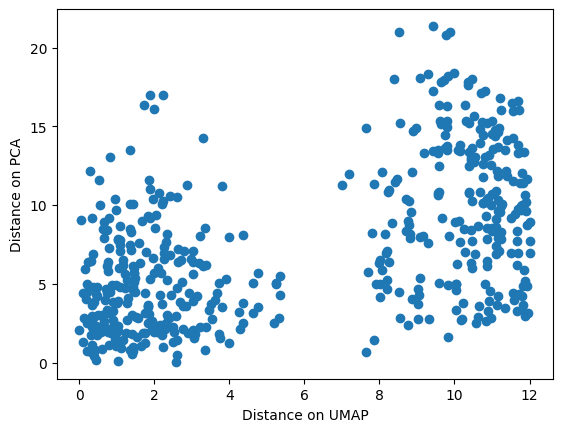

In [72]:
# euclidian vs cosine
x = "Distance on UMAP"
y = "Cosine distance"
plt.plot(x2,x1,'o')
plt.xlabel("Distance on UMAP")
plt.ylabel("Distance on PCA")
plt.show()

In [64]:
x1

array([10.67085303, 12.09286151,  4.37983126,  8.16499697,  2.81362144,
        6.26997203,  3.96656085, 13.34993531, 11.87507156, 11.51427806,
        5.35364778,  2.64124663, 10.24388901, 12.56071619,  7.62209758,
       10.92212219, 14.45620739, 18.16596726,  6.10228087, 15.20174889,
       13.82317925,  8.83182485,  1.90528931, 12.13217759, 13.51208286,
       15.17705509,  5.36647217, 10.39869257,  3.86052375,  4.68648109,
        2.04200397,  2.1112711 ,  6.44025479,  2.80451116, 13.37953888,
        4.414293  , 13.49832923,  2.70770606,  1.47195782,  0.85675189,
        5.32755045, 13.30773859,  1.86116703,  2.49613013,  3.1422833 ,
        1.00309261,  4.30522769,  8.0424017 ,  7.70526565,  5.10042184,
        3.3433183 ,  2.48805354,  8.9344731 ,  2.15198744,  4.87569679,
        5.03706321, 12.98963031,  1.91798497,  8.7068972 ,  6.93514395,
        9.15394542,  8.09539806,  3.92794096, 14.87348758,  6.0285321 ,
       15.20933946,  2.50115416,  0.7772552 ,  1.57154594,  6.89

In [84]:
# np.linalg.norm(pca_traj_df_sub.iloc[0]-pca_traj_df_sub.iloc[1])

10.670853031853596

In [120]:
#  compute distances between consecutive rows, i.e. 0 and 1, 1 and 2, 2 and 3, ...
def find_consecutive_distances(coordinates_df):
    cons_dist = []
    for i in range(1,len(coordinates_df)):
        dist = np.linalg.norm(coordinates_df.iloc[i-1]-coordinates_df.iloc[i])
        cons_dist.append(dist)
    return(cons_dist)

In [117]:
cons_dist

[10.670853031853596,
 2.111271098081745,
 8.09539805876255,
 4.283718800153953,
 10.947479027099623,
 8.965298301471258,
 9.180964928903697,
 16.031235757091718,
 2.006605470862775,
 0.8058669675815994,
 6.1771380837363905,
 7.984564054429932,
 12.872600747317438,
 2.346000848327931,
 4.969529257715745,
 3.3004177608874197,
 3.658592197543777,
 3.7792406341812677,
 13.480317161486852,
 10.758336307836492,
 1.9218512397059981,
 5.0711057550210885,
 6.981231858781568,
 10.29520777510862,
 2.821833607994192,
 2.766058117962978,
 17.988273536421175,
 13.469488472443594,
 7.8246258173773064,
 1.7761627039142585,
 2.6938152576838346]

In [122]:
pca_dist = find_consecutive_distances(pca_traj_df_sub)
umap_dist = find_consecutive_distances(traj_df)

Text(7, 6, 'R² = 0.64')

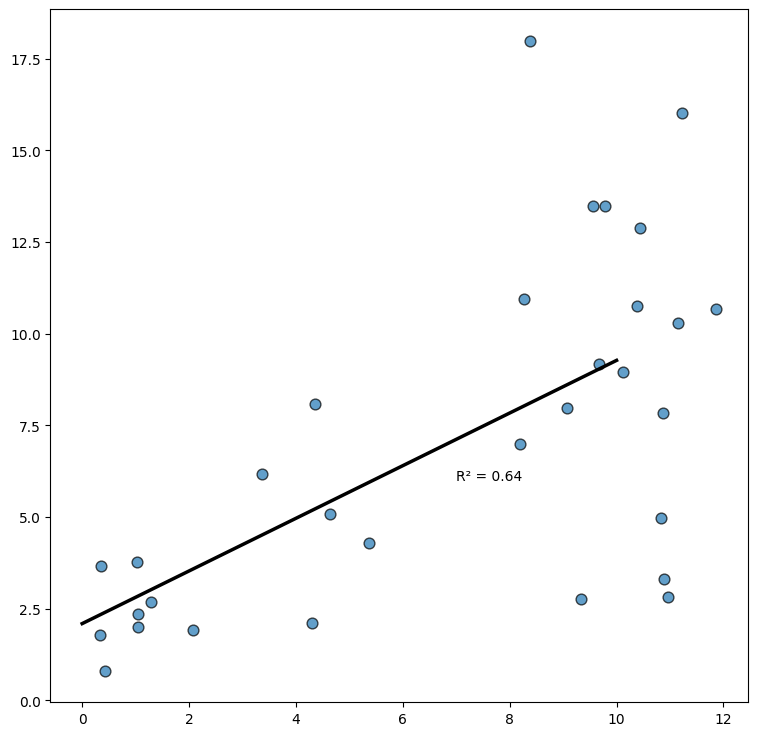

In [130]:
import scipy as sp
linreg = sp.stats.linregress(umap_dist, pca_dist)
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(umap_dist, pca_dist, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(umap_dist, pca_dist, deg=1)

# Create sequence of 100 numbers from 0 to 100
xseq = np.linspace(0, 10, num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5);
plt.text(7, 6, 'R\u00B2 = %0.2f' % linreg.rvalue)

In [151]:
def plot_cells(selected_cells, umap_coords):
    sub_cell = umap_coords[umap_coords.index.isin(selected_cells)]
    plt.figure(figsize=(10, 10))
    ax = plt.axes()
    ax.scatter(umap_coords.iloc[:,0], umap_coords.iloc[:,1])
    # scatter warning points in red (c='r')

    ax.plot(sub_cell.iloc[:,0], sub_cell.iloc[:,1], 'ro-', c='r')
    plt.show()

/tmp/ipykernel_293861/568120750.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(sub_cell.iloc[:,0], sub_cell.iloc[:,1], 'ro-', c='r')


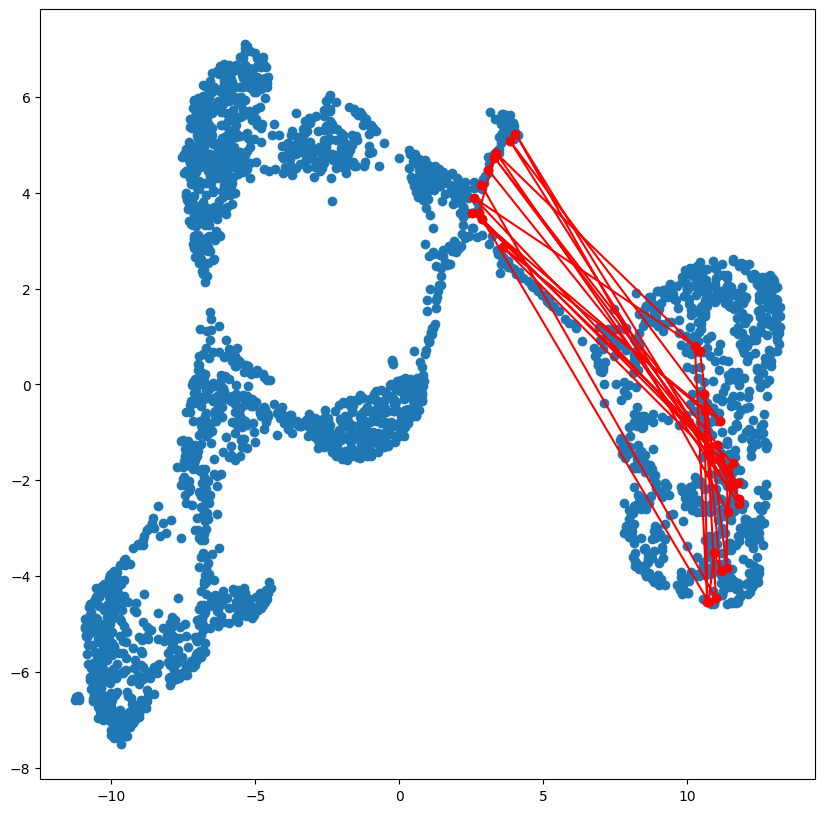

In [153]:
plot_cells(cells,umap_df)

/tmp/ipykernel_293861/568120750.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(sub_cell.iloc[:,0], sub_cell.iloc[:,1], 'ro-', c='r')


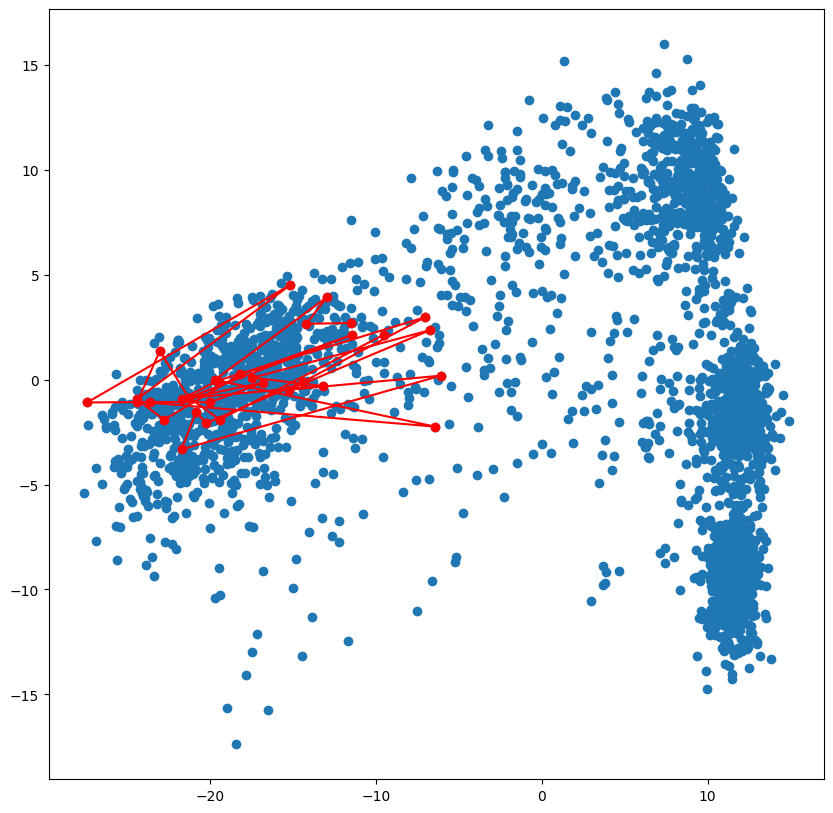

In [152]:
plot_cells(cells,pca_df)